<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notebook-setup" data-toc-modified-id="Notebook-setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook setup</a></span></li><li><span><a href="#Functions-for-plotting-age-dependence" data-toc-modified-id="Functions-for-plotting-age-dependence-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions for plotting age dependence</a></span><ul class="toc-item"><li><span><a href="#Single-fitness-effect-and-mutation-rate" data-toc-modified-id="Single-fitness-effect-and-mutation-rate-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Single fitness effect and mutation rate</a></span></li><li><span><a href="#2-separate-fitness-effects-and-mutation-rates-(mLOX)" data-toc-modified-id="2-separate-fitness-effects-and-mutation-rates-(mLOX)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2 separate fitness effects and mutation rates (mLOX)</a></span></li></ul></li><li><span><a href="#Age-prevalence-of-mLOX-and-mLOY" data-toc-modified-id="Age-prevalence-of-mLOX-and-mLOY-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Age prevalence of mLOX and mLOY</a></span><ul class="toc-item"><li><span><a href="#mLOY" data-toc-modified-id="mLOY-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>mLOY</a></span></li><li><span><a href="#mLOX" data-toc-modified-id="mLOX-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>mLOX</a></span><ul class="toc-item"><li><span><a href="#Age-dependence-assuming-mLOX-has-a-single-fitness-(s)-and-mutation-rate-(mu)" data-toc-modified-id="Age-dependence-assuming-mLOX-has-a-single-fitness-(s)-and-mutation-rate-(mu)-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Age dependence assuming mLOX has a single fitness (s) and mutation rate (mu)</a></span></li><li><span><a href="#Age-dependence-for-mLOX-with-2-different-fitness-(s1,-s2)-and-mutation-rates-(mu1,-mu2)" data-toc-modified-id="Age-dependence-for-mLOX-with-2-different-fitness-(s1,-s2)-and-mutation-rates-(mu1,-mu2)-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Age dependence for mLOX with 2 different fitness (s1, s2) and mutation rates (mu1, mu2)</a></span></li></ul></li></ul></li></ul></div>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Notebook setup

In [2]:
# imported packages
import math
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
from scipy import integrate

In [3]:
plt.style.use('cwpython.mplstyle') #use custom style file

In [4]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'

In [5]:
neutral_color='#fdbf6f'
gain_color = '#e31a1c'
loss_color = '#a6cee3'

In [6]:
male_loss_color = '#243161'
female_loss_color = '#6badd6'

In [7]:
sex_colors_dict = {'M': 
                      {'+': 
                       {'observed': '#a50f15',
                       'expected': '#ef3b2c'},
                      '-':
                      {'observed': '#08306b',
                      'expected': '#2171b5'},
                      '=':
                      {'observed': '#993404',
                      'expected': '#ec7014'}},
                     'F':
                     {'+': 
                       {'observed': '#fb6a4a',
                       'expected': '#fcbba1'},
                      '-':
                      {'observed': '#4292c6',
                      'expected': '#9ecae1'},
                      '=':
                      {'observed': '#fe9929',
                      'expected': '#fee391'}}}

# Functions for plotting age dependence

In [8]:
def mCA_specific_fmin_X_Y(df):
    
    df['CELL_FRAC'] = df['CELL_FRAC'].astype(float)
    cell_fractions = df['CELL_FRAC'].tolist()
    min_cell_frac = min(cell_fractions)
    fmin = min_cell_frac*1.5
    
    return fmin

In [9]:
def errors(number_people_with_mCA, total_each_age_group):
    square_root_number_mCA = [math.sqrt(i) for i in number_people_with_mCA]
    error = [x/y for x, y in zip(map(int, square_root_number_mCA), map(float, total_each_age_group))]
    error_percentage = [(x/y)*100 for x, y in zip(map(int, square_root_number_mCA), map(float, total_each_age_group))] #percentage rather than freq
    return error_percentage

In [10]:
def density_of_clones(f, u, s, t):
    N = 9.40166610e+04
    s = float(s)
    u = float(u)
    return ((N*u)/(f*(1-f)))*np.exp(-f/((1-f)*((np.exp(s*t)-1)/(N*s))))

## Single fitness effect and mutation rate

In [11]:
def expected_prevalence_X_Y(t, u, s, fmin, mCA): 
    N = 9.40166610e+04
    integral_limit = 0.67

    return integrate.quad(lambda f: density_of_clones(f, u, s, t), fmin, integral_limit)[0]

In [12]:
def expected_number_by_age(mCA, fmin, X_Y_s_mu_dict):

    s = X_Y_s_mu_dict[mCA]['s']
    u = X_Y_s_mu_dict[mCA]['mu']

    xx=np.array([t for t in range(0,80)])
    yy=[expected_prevalence_X_Y(t, u, s, fmin, mCA) for t in xx]

    age_expected = {}
    for age, expected in zip(xx, yy):
        age_expected[age]=expected

    return age_expected

In [13]:
def plot_observed_expected_prevalence_mCA_X_Y(mCA, observed_dict, total_people_dict, X_Y_s_mu_dict, fmin, sex, ax): #can have just 1 mCA in the list of mCAs
    
    if sex == 'M':
        expected_label = 'expected male'
        observed_label = 'observed male'
        color = male_loss_color
        
    if sex == 'F':
        expected_label = 'expected female'
        observed_label = 'observed female'
        color = female_loss_color

    marker = 'o'
    
    ## PLOT THE EXPECTED #####
    total_expected = expected_number_by_age(mCA, fmin, X_Y_s_mu_dict) #dictionary where key = age, value = expected frequency

    plot_x = []
    plot_y = []
    for k, v in total_expected.items():
        plot_x.append(k)
        plot_y.append(v*100) #multiply by 100 so in terms of percentage rather than frequency

    ax.plot(plot_x, plot_y, color = color, lw = 2, zorder = 0, alpha = 1.0, label = expected_label)

    ## PLOT THE OBSERVED ######
    total = 0
    numbers_list = observed_dict.values()
    total_people_list = total_people_dict.values()
    
    freq_list_percentage = []
    for a, b in zip(numbers_list, total_people_list):
        frequency = a/b
        freq_list_percentage.append(frequency*100)

    errors_list = errors(numbers_list, total_people_list)

    ax.errorbar([42.5, 47.5, 52.5, 57.5, 62.5, 67.5, 72.5], freq_list_percentage, yerr= errors_list, fmt = marker, ecolor = color, \
             elinewidth = 2, capsize = 4, capthick = 2, \
             markersize = 10, markeredgewidth = 2, markeredgecolor = color,\
             markerfacecolor = color, zorder=0, label = observed_label, alpha = 0.8)
    
    return ax

In [37]:
def age_prevalence_mCA_plot_X_Y(observed_dict, total_people_dict, X_Y_s_mu_dict, fmin, mCA):
    
    if mCA == 'Y-':
        sex = 'M'
        sex_written = 'male'
        mCA_name = 'mLOY'
    if mCA == 'X-':
        sex = 'F'
        sex_written = 'female'
        mCA_name = 'mLOX'
    
    total_people_with_mCA = 0
    for k, v in observed_dict.items():
        total_people_with_mCA+= v

    fig, ax1 = plt.subplots(figsize=(6, 5), nrows=1, ncols=1)
    fig.subplots_adjust(hspace=0.3, wspace = 0.6)
    
    plot_observed_expected_prevalence_mCA_X_Y(mCA, observed_dict, total_people_dict, X_Y_s_mu_dict, fmin, sex, ax1)

    ax1.set_title(mCA_name+'\n('+sex_written+' = '+str(total_people_with_mCA)+', fmin = '+str(round(fmin*100, 2))+'%)')
    
    ax1.legend()
    
    ax1.set_xlabel('age')
    ax1.set_ylabel('proportion of individuals with '+mCA+' (%)')
    ax1.tick_params(axis = 'both', which = 'major', color = grey4)
    ax1.tick_params(axis = 'both', which='minor', bottom=False)
    ax1.set_xlim(0, 80)
        
    plt.tight_layout()
    plt.savefig('Figures/Age_prevalence_'+mCA+'.pdf')

    return plt.show()

## 2 separate fitness effects and mutation rates (mLOX)

In [15]:
def expected_prevalence_2s2mu(t, u1, u2, s1, s2, fmin, mCA): 
    N = 9.40166610e+04
    
    integral_limit = 0.67
        
    total_prevalence = integrate.quad(lambda f: density_of_clones(f, u1, s1, t), fmin, integral_limit)[0]+\
    integrate.quad(lambda f: density_of_clones(f, u2, s2, t), fmin, integral_limit)[0]

    return total_prevalence

In [16]:
def expected_number_by_age_2s2mu(mCA, fmin, s1, s2, mu1, mu2):

    s = X_Y_s_mu_dict[mCA]['s']
    u = X_Y_s_mu_dict[mCA]['mu']

    xx=np.array([t for t in range(0,80)])
    yy=[expected_prevalence_2s2mu(t, mu1, mu2, s1, s2, fmin, mCA) for t in xx]

    age_expected = {}
    for age, expected in zip(xx, yy):
        age_expected[age]=expected

    return age_expected

In [17]:
def plot_observed_expected_prevalence_mCA_2s2mu(mCA, observed_dict, total_people_dict, s1, s2, mu1, mu2, fmin, sex, ax): #can have just 1 mCA in the list of mCAs
    
    if sex == 'M':
        expected_label = 'expected male'
        observed_label = 'observed male'
        color = male_loss_color
        
    if sex == 'F':
        expected_label = 'expected female'
        observed_label = 'observed female'
        color = female_loss_color

    marker = 'o'
    
    ## PLOT THE EXPECTED #####
    total_expected = expected_number_by_age_2s2mu(mCA, fmin, s1, s2, mu1, mu2) #dictionary where key = age, value = expected frequency

    plot_x = []
    plot_y = []
    for k, v in total_expected.items():
        plot_x.append(k)
        plot_y.append(v*100) #multiply by 100 so in terms of percentage rather than frequency

    ax.plot(plot_x, plot_y, color = color, lw = 2, zorder = 0, alpha = 1.0, label = expected_label)

    ## PLOT THE OBSERVED ######
    total = 0
    numbers_list = observed_dict.values()
    total_people_list = total_people_dict.values()
    
    freq_list_percentage = []
    for a, b in zip(numbers_list, total_people_list):
        frequency = a/b
        freq_list_percentage.append(frequency*100)

    errors_list = errors(numbers_list, total_people_list)

    ax.errorbar([42.5, 47.5, 52.5, 57.5, 62.5, 67.5, 72.5], freq_list_percentage, yerr= errors_list, fmt = marker, ecolor = color, \
             elinewidth = 2, capsize = 4, capthick = 2, \
             markersize = 10, markeredgewidth = 2, markeredgecolor = color,\
             markerfacecolor = color, zorder=0, label = observed_label, alpha = 0.8)
    
    return ax

In [44]:
def age_prevalence_mCA_plot_2s2mu(observed_dict, total_people_dict, s1, s2, mu1, mu2, fmin, mCA):
    
    if mCA == 'Y-':
        sex = 'M'
        sex_written = 'male'
        mCA_name = 'mLOY'
    if mCA == 'X-':
        sex = 'F'
        sex_written = 'female'
        mCA_name = 'mLOX'
    
    total_people_with_mCA = 0
    for k, v in observed_dict.items():
        total_people_with_mCA+= v

    fig, ax1 = plt.subplots(figsize=(6, 5), nrows=1, ncols=1)
    fig.subplots_adjust(hspace=0.3, wspace = 0.6)
    
    plot_observed_expected_prevalence_mCA_2s2mu(mCA, observed_dict, total_people_dict, s1, s2, mu1, mu2, fmin, sex, ax1)

    ax1.set_title(mCA_name+' (2 $s$, 2$\u03BC$)\n('+sex_written+' = '+str(total_people_with_mCA)+', fmin = '+str(round(fmin*100, 2))+'%)')
    
    ax1.legend()
    
    ax1.set_xlabel('age')
    ax1.set_ylabel('proportion of individuals with '+mCA+' (%)')
    ax1.tick_params(axis = 'both', which = 'major', color = grey4)
    ax1.tick_params(axis = 'both', which='minor', bottom=False)
    ax1.set_xlim(0, 80)
        
    plt.tight_layout()
    plt.savefig('Figures/Age_prevalence_'+mCA+'_2s2mu.pdf')

    return plt.show()

# Age prevalence of mLOX and mLOY

In [19]:
losses_fmin = 0.041

In [35]:
#single fitness and mutation rates
s_mu_df = pd.read_csv('Data_files/mCA_s_mu_with_confidence_intervals_individual_mCAs_chromosome_X_and_Y_biobank.txt', sep = '\t')
s_mu_df2 = s_mu_df[['mCA', 's', 'mu']]
s_mu_df2 = s_mu_df2.set_index('mCA')
X_Y_s_mu_dict = s_mu_df2.to_dict(orient = 'index')
X_Y_s_mu_dict
# X_Y_s_mu_dict = {'X-': {'s': 0.118112244897959, 'mu': 0.0000001211891057881}, 'Y-': {'s': 0.13172449, 'mu': 8.61582768017863E-07}}

{'X-1': {'s': 0.073107143, 'mu': 1.55e-06},
 'X-2': {'s': 0.156734694, 'mu': 1.11e-08},
 'Y-': {'s': 0.131285714, 'mu': 8.78e-07},
 'X-': {'s': 0.096428571, 'mu': 3.3e-07}}

## mLOY

In [20]:
mLOY_df = pd.read_csv('Data_files/mLOY_CELL_FRAC.txt', sep = '\t')
mLOY_fmin = mCA_specific_fmin_X_Y(mLOY_df)
print('mLOY_fmin = ', mLOY_fmin)

mLOY_fmin =  0.03


In [21]:
mLOY_numbers = {
    '40-45': 104,
    '45-50': 367,
    '50-55': 1163,
    '55-60': 3075,
    '60-65': 7629,
    '65-70': 9722,
    '70-75': 307}

total_men_with_mLOY = 0
for numbers in mLOY_numbers.values():
    total_men_with_mLOY+=numbers

print('total number of men with mLOY = ', total_men_with_mLOY)

total number of men with mLOY =  22367


In [22]:
total_men_age_groups = {
    '40-45': 23078,
    '45-50': 28156,
    '50-55': 31869,
    '55-60': 38614,
    '60-65': 53462,
    '65-70': 44527,
    '70-75': 1187}

total_men = 0
for numbers in total_men_age_groups.values():
    total_men+=numbers

print('total number of men = ', total_men)

total number of men =  220893


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


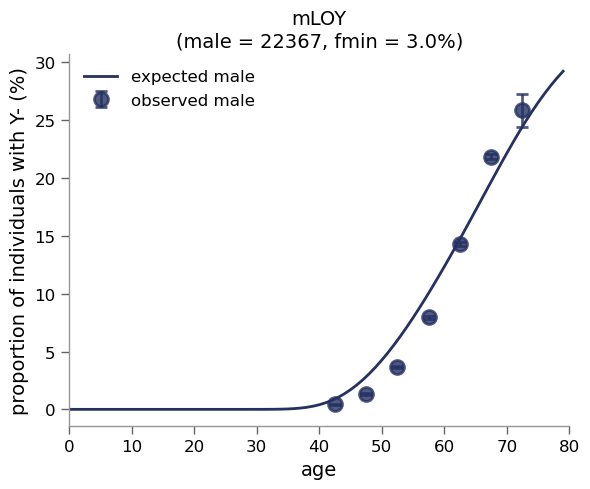

In [38]:
age_prevalence_mCA_plot_X_Y(mLOY_numbers, total_men_age_groups, X_Y_s_mu_dict, mLOY_fmin, 'Y-')

## mLOX

In [39]:
mLOX_df = pd.read_csv('Data_files/mLOX_CELL_FRAC.txt', sep = '\t')
mLOX_fmin = mCA_specific_fmin_X_Y(mLOX_df)
print('mLOX_fmin = ', mLOX_fmin)

mLOX_fmin =  0.012


### Age dependence assuming mLOX has a single fitness (s) and mutation rate (mu)

In [40]:
mLOX_numbers = {
    '40-45': 120,
    '45-50': 254,
    '50-55': 569,
    '55-60': 1301,
    '60-65': 2991,
    '65-70': 3253,
    '70-75': 89}

total_women_with_mLOX = 0
for numbers in mLOX_numbers.values():
    total_women_with_mLOX+=numbers

print('total number of women with mLOX = ', total_women_with_mLOX)

total number of women with mLOX =  8577


In [41]:
total_women_age_groups = {
    '40-45': 26598,
    '45-50': 35211,
    '50-55': 41397,
    '55-60': 48605,
    '60-65': 63511,
    '65-70': 45433,
    '70-75': 1134}

total_women = 0
for numbers in total_women_age_groups.values():
    total_women+=numbers

print('total number of women = ', total_women)

total number of women =  261889


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


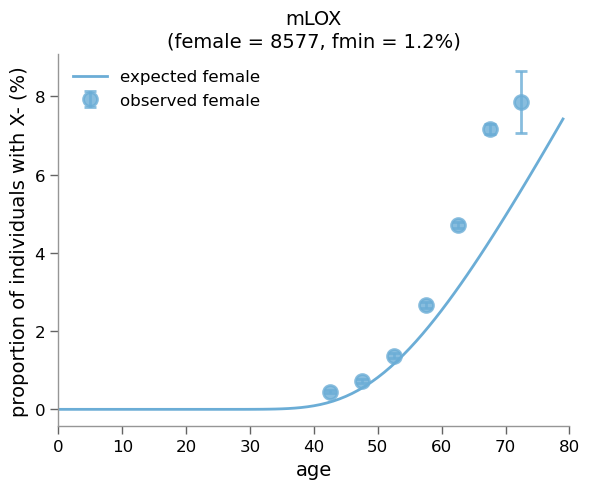

In [42]:
age_prevalence_mCA_plot_X_Y(mLOX_numbers, total_women_age_groups, X_Y_s_mu_dict, mLOX_fmin, 'X-')

### Age dependence for mLOX with 2 different fitness (s1, s2) and mutation rates (mu1, mu2)

In [48]:
# inferred s1, s2, mu1, mu2
s1 = X_Y_s_mu_dict['X-1']['s']
s2 = X_Y_s_mu_dict['X-2']['s']
mu1 = X_Y_s_mu_dict['X-1']['mu']
mu2 = X_Y_s_mu_dict['X-2']['mu']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


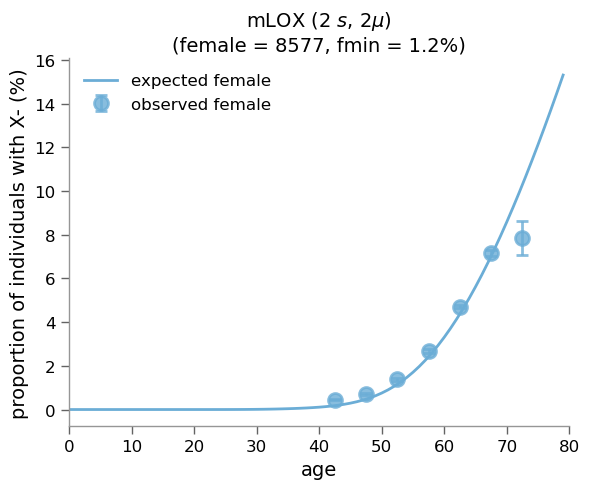

In [49]:
age_prevalence_mCA_plot_2s2mu(mLOX_numbers, total_women_age_groups, s1, s2, mu1, mu2, mLOX_fmin, 'X-')